<a href="https://colab.research.google.com/github/satyanarayanaallam/transformers-poc/blob/main/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent — step-by-step playground
This notebook is designed to teach gradient descent concepts **by doing**.
Instructions:
1. Run each code cell in order (Shift+Enter).
2. Read the short note after each cell explaining what to observe.
3. If something looks surprising, paste the output here and we'll debug or explain it.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
np.random.seed(42)

In [23]:
# plotting settings (keeps plots legible)
plt.rcParams.update({
    "figure.figsize": (8,5),
    "axes.grid": True,
    "grid.linestyle": "--",
    "font.size": 12
})

In [24]:
# Cell 3 - synthetic linear data
m=100
x = np.linspace(0, 10, m)
true_bias, true_slope = 5.0, 3.0
noise = np.random.normal(0, 2.0, size=m)  # gaussian noise
y = true_bias + true_slope * x + noise

In [25]:
print(type(x))
print(type(noise))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [26]:
x

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [27]:
noise

array([ 0.99342831, -0.2765286 ,  1.29537708,  3.04605971, -0.46830675,
       -0.46827391,  3.15842563,  1.53486946, -0.93894877,  1.08512009,
       -0.92683539, -0.93145951,  0.48392454, -3.82656049, -3.44983567,
       -1.12457506, -2.02566224,  0.62849467, -1.81604815, -2.8246074 ,
        2.93129754, -0.4515526 ,  0.13505641, -2.84949637, -1.08876545,
        0.22184518, -2.30198715,  0.75139604, -1.20127738, -0.5833875 ,
       -1.20341322,  3.70455637, -0.02699445, -2.11542186,  1.64508982,
       -2.4416873 ,  0.41772719, -3.91934025, -2.6563721 ,  0.39372247,
        1.47693316,  0.34273656, -0.23129656, -0.60220739, -2.95704398,
       -1.43968842, -0.92127754,  2.11424445,  0.68723658, -3.52608031,
        0.64816794, -0.77016456, -1.353844  ,  1.22335258,  2.06199904,
        1.86256024, -1.67843505, -0.61842475,  0.66252686,  1.95109025,
       -0.95834848, -0.37131795, -2.21266995, -2.39241325,  1.62505164,
        2.71248006, -0.14402024,  2.0070658 ,  0.72327205, -1.29

In [15]:
np.min(noise)

np.float64(-5.239490208179489)

In [16]:
df=pd.DataFrame({'x': x, 'y': y})
df

,x,y
0,0.00000,5.993428
1,0.10101,5.026502
2,0.20202,6.901438
3,0.30303,8.955151
4,0.40404,5.743814
...,...,...
95,9.59596,30.860849
96,9.69697,34.683150
97,9.79798,34.916050
98,9.89899,34.707197


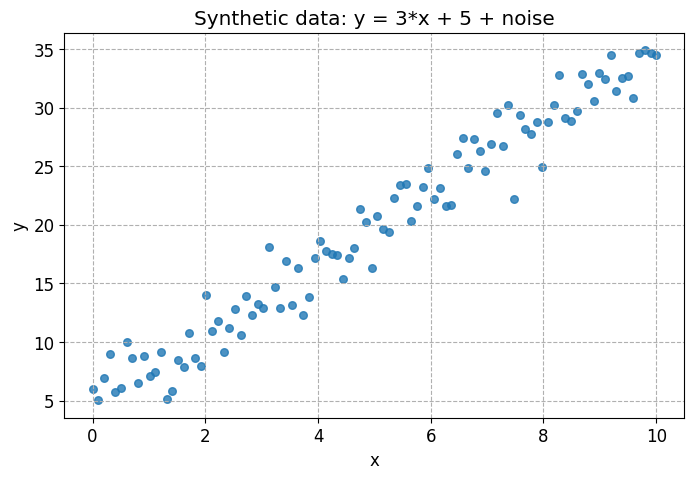

In [17]:
# scatter
plt.scatter(x, y, s=30, alpha=0.8)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Synthetic data: y = 3*x + 5 + noise")
plt.show()

In [18]:
m = len(y)
X = np.column_stack((np.ones(m), x))  # shape (m, 2) with bias column

In [19]:
def compute_cost(theta,X,y):
  return (1.0/(2*m))*np.sum((X.dot(theta)-y)**2);


In [20]:
# initial test
theta_zero = np.zeros(2)
print("Initial cost (theta zeros):", compute_cost(theta_zero, X, y))

Initial cost (theta zeros): 236.46192360965168


In [29]:
theta_zero

array([0., 0.])

In [30]:
def gradient_descent(X, y, theta_init, alpha=0.01, num_iters=1000, tol=1e-12):
    """
    Vanilla (batch) gradient descent.
    Returns final theta and J_history (cost per iteration).
    Stops early if cost change below tol.
    """
    m = len(y)
    theta = theta_init.astype(float).copy()
    J_history = []
    for i in range(num_iters):
        preds = X.dot(theta)
        error = preds - y
        grad = (1.0 / m) * X.T.dot(error)   # vectorized gradient
        theta = theta - alpha * grad
        J = (1.0 / (2*m)) * np.sum((X.dot(theta) - y)**2)
        J_history.append(J)
        if i>0 and abs(J_history[-2] - J_history[-1]) < tol:
            # converged numerically
            break
        if np.isnan(J) or np.isinf(J):
            print(f"Numerical issue at iter {i}, stopping. J={J}")
            break
    return theta, np.array(J_history)

# quick smoke test
theta_init = np.zeros(2)
theta_test, J_hist_test = gradient_descent(X, y, theta_init, alpha=0.01, num_iters=200)
print("theta after 200 iters (alpha=0.01):", theta_test)
print("cost (last):", J_hist_test[-1])

theta after 200 iters (alpha=0.01): [2.1563266  3.40319344]
cost (last): 2.4217286695565905


Numerical issue at iter 394, stopping. J=inf


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


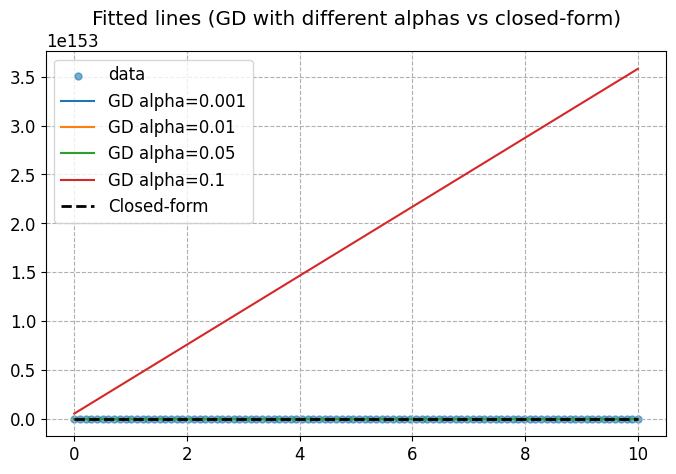

/usr/local/lib/python3.12/dist-packages/matplotlib/scale.py:253: RuntimeWarning: overflow encountered in power
  return np.power(self.base, values)


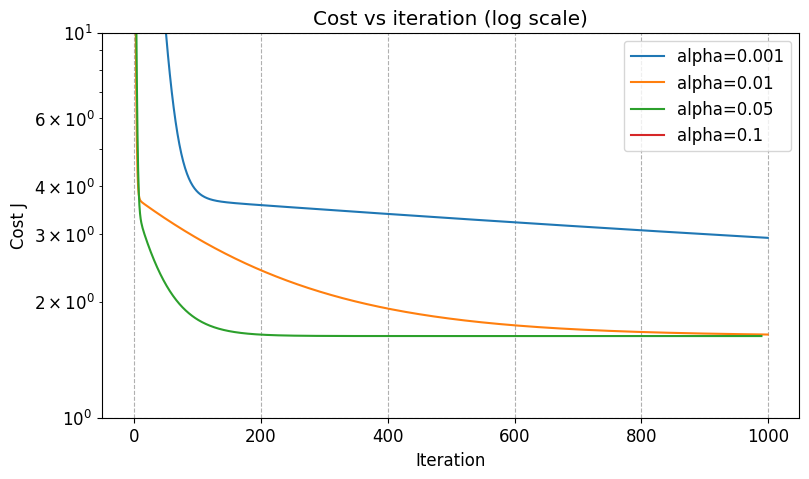

alpha= 0.001  theta=[1.45071133 3.50928988]  last_cost=2.932295
alpha=  0.01  theta=[4.3122398  3.07902994]  last_cost=1.644664
alpha=  0.05  theta=[4.65435674 3.02758917]  last_cost=1.629809
alpha=   0.1  theta=[5.30417105e+151 3.52764339e+152]  last_cost=inf
Closed-form theta: [4.65437429 3.02758653]


In [31]:
# Cell 6 - test multiple learning rates
alphas = [0.001, 0.01, 0.05, 0.1]   # we will observe behavior across these
num_iters = 1000
theta_init = np.zeros(2)

results = {}
plt.scatter(x, y, s=25, alpha=0.6, label="data")
x_line = np.array([x.min(), x.max()])

for a in alphas:
    th, J_hist = gradient_descent(X, y, theta_init, alpha=a, num_iters=num_iters)
    results[a] = {"theta": th, "J": J_hist}
    y_line = th[0] + th[1] * x_line
    plt.plot(x_line, y_line, label=f"GD alpha={a}")

# closed-form (normal equation) for reference
theta_closed = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
plt.plot(x_line, theta_closed[0] + theta_closed[1]*x_line, 'k--', linewidth=2, label="Closed-form")
plt.legend()
plt.title("Fitted lines (GD with different alphas vs closed-form)")
plt.show()

# plot cost histories (log scale helps)
plt.figure(figsize=(9,5))
for a in alphas:
    J = results[a]["J"]
    # some configs may have very short J-history if early stop or NaN, guard for that
    if len(J) > 1:
        plt.plot(J, label=f'alpha={a}')
plt.xlabel("Iteration")
plt.ylabel("Cost J")
plt.yscale('log')   # helps compare convergence rates
plt.legend()
plt.title("Cost vs iteration (log scale)")
plt.show()

# numeric summary
for a in alphas:
    th = results[a]["theta"]
    lastJ = results[a]["J"][-1] if len(results[a]["J"])>0 else np.nan
    print(f"alpha={a:6}  theta={th}  last_cost={lastJ:.6f}")
print("Closed-form theta:", theta_closed)

theta (no scaling, alpha=0.01): [3.46908524 3.20580681]
theta (scaling used, converted to original coords): [np.float64(4.654373718415481), np.float64(3.027586161667595)]
Closed-form theta: [4.65437429 3.02758653]


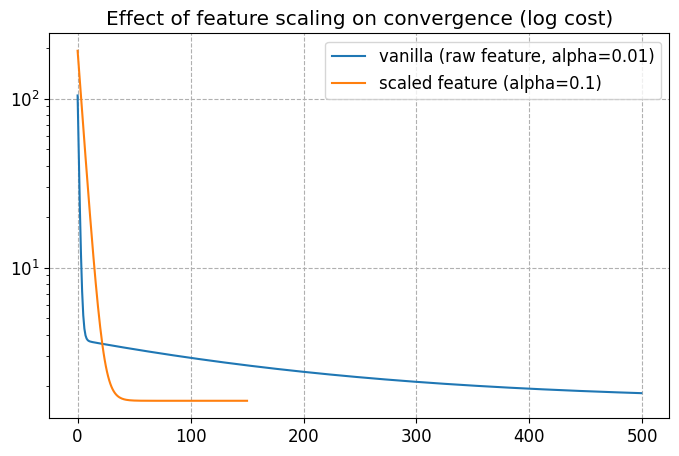

In [32]:
# Cell 7 - feature scaling example
x_mean = x.mean()
x_std = x.std()
x_scaled = (x - x_mean) / x_std
X_scaled = np.column_stack((np.ones(m), x_scaled))

# run GD on original and scaled features with comparable iteration budgets
theta_orig, J_orig = gradient_descent(X, y, np.zeros(2), alpha=0.01, num_iters=500)
theta_scaled, J_scaled = gradient_descent(X_scaled, y, np.zeros(2), alpha=0.1, num_iters=500)

# convert scaled-theta to original coordinates:
# y = theta0_scaled + theta1_scaled * (x-x_mean)/x_std
# => y = (theta0_scaled - theta1_scaled*(x_mean/x_std)) + (theta1_scaled/x_std)*x
theta1_from_scaled = theta_scaled[1] / x_std
theta0_from_scaled = theta_scaled[0] - (theta_scaled[1] * x_mean) / x_std

print("theta (no scaling, alpha=0.01):", theta_orig)
print("theta (scaling used, converted to original coords):", [theta0_from_scaled, theta1_from_scaled])
print("Closed-form theta:", theta_closed)

# Plot costs to compare convergence speed
plt.plot(J_orig, label='vanilla (raw feature, alpha=0.01)')
plt.plot(J_scaled, label='scaled feature (alpha=0.1)')
plt.yscale('log')
plt.legend()
plt.title("Effect of feature scaling on convergence (log cost)")
plt.show()


SGD theta (batch=1): [4.68714092 3.16672116]
Mini-batch theta (batch=16): [4.63671022 3.03116471]


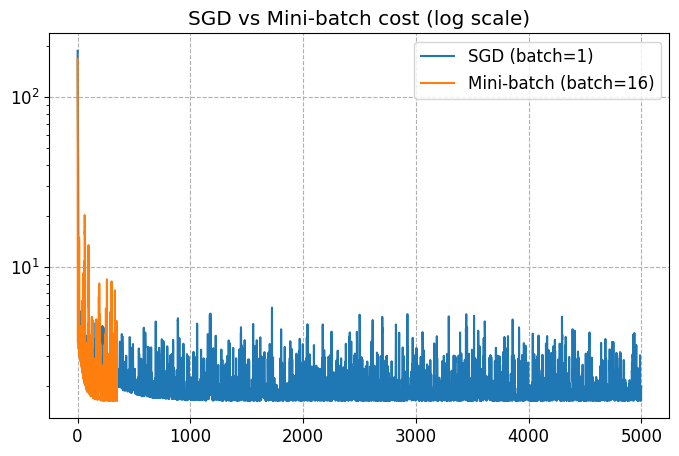

In [33]:
# Cell 8 - stochastic / mini-batch GD
def sgd(X, y, theta_init, alpha=0.01, epochs=20, batch_size=1, shuffle=True, clip_norm=None):
    """
    batch_size=1 -> SGD, batch_size>1 smaller -> mini-batch
    Returns final theta and cost history (recorded after each parameter update).
    """
    m = len(y)
    theta = theta_init.copy().astype(float)
    J_history = []
    for epoch in range(epochs):
        idxs = np.arange(m)
        if shuffle:
            np.random.shuffle(idxs)
        for start in range(0, m, batch_size):
            batch_idx = idxs[start:start+batch_size]
            Xb = X[batch_idx]
            yb = y[batch_idx]
            preds = Xb.dot(theta)
            error = preds - yb
            grad = (1.0 / len(yb)) * Xb.T.dot(error)
            # optional gradient clipping
            if clip_norm is not None:
                norm = np.linalg.norm(grad)
                if norm > clip_norm:
                    grad = grad * (clip_norm / norm)
            theta = theta - alpha * grad
            J_history.append((1.0 / (2*m)) * np.sum((X.dot(theta) - y)**2))
    return theta, np.array(J_history)

# run SGD and mini-batch
theta_sgd, J_sgd = sgd(X, y, np.zeros(2), alpha=0.01, epochs=50, batch_size=1)
theta_mb, J_mb = sgd(X, y, np.zeros(2), alpha=0.05, epochs=50, batch_size=16)

print("SGD theta (batch=1):", theta_sgd)
print("Mini-batch theta (batch=16):", theta_mb)

plt.plot(J_sgd, label='SGD (batch=1)')
plt.plot(J_mb, label='Mini-batch (batch=16)')
plt.yscale('log')
plt.legend()
plt.title('SGD vs Mini-batch cost (log scale)')
plt.show()


vanilla theta: [3.46908524 3.20580681]
momentum theta: [4.65437427 3.02758654]


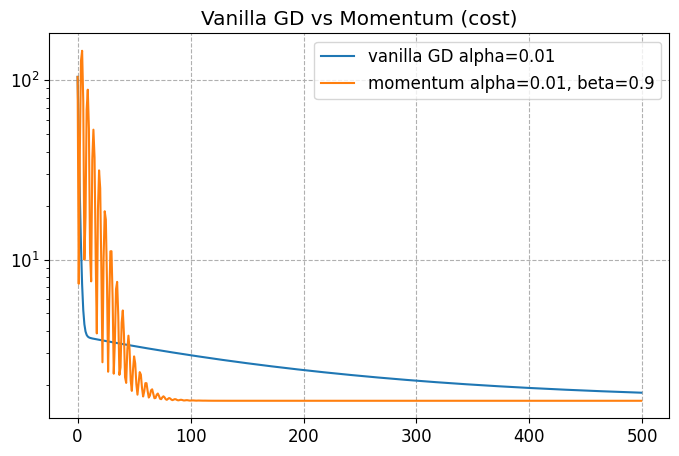

In [34]:
# Cell 9 - gradient descent with momentum
def gradient_descent_momentum(X, y, theta_init, alpha=0.01, beta=0.9, num_iters=1000):
    m = len(y)
    theta = theta_init.copy().astype(float)
    v = np.zeros_like(theta)
    J_history = []
    for i in range(num_iters):
        preds = X.dot(theta)
        error = preds - y
        grad = (1.0 / m) * X.T.dot(error)
        v = beta * v + grad           # accumulate velocity (grad not scaled)
        theta = theta - alpha * v     # use velocity scaled by learning rate
        J_history.append((1.0 / (2*m)) * np.sum((X.dot(theta) - y)**2))
    return theta, np.array(J_history)

# compare vanilla vs momentum
theta_vanilla, J_vanilla = gradient_descent(X, y, np.zeros(2), alpha=0.01, num_iters=500)
theta_mom, J_mom = gradient_descent_momentum(X, y, np.zeros(2), alpha=0.01, beta=0.9, num_iters=500)

print("vanilla theta:", theta_vanilla)
print("momentum theta:", theta_mom)

plt.plot(J_vanilla, label='vanilla GD alpha=0.01')
plt.plot(J_mom, label='momentum alpha=0.01, beta=0.9')
plt.yscale('log')
plt.legend()
plt.title("Vanilla GD vs Momentum (cost)")
plt.show()


/tmp/ipython-input-1834051850.py:15: RuntimeWarning: overflow encountered in square
  J_history.append((1.0 / (2*m)) * np.sum((X.dot(theta) - y)**2))


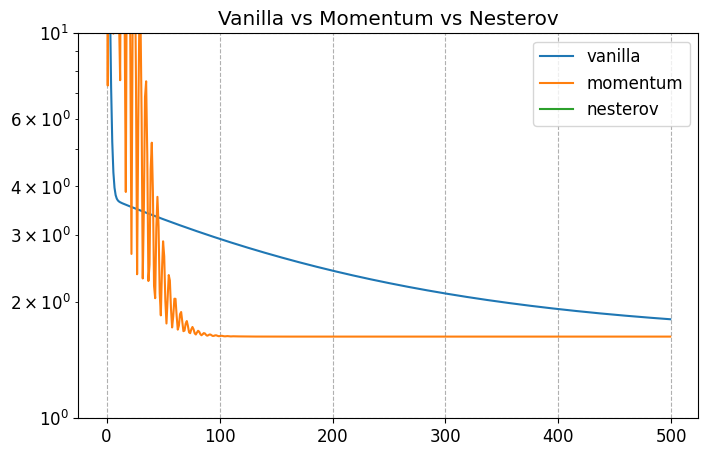

Nesterov theta: [nan nan]


In [35]:
# Cell 10 - Nesterov
def gradient_descent_nesterov(X, y, theta_init, alpha=0.01, beta=0.9, num_iters=1000):
    m = len(y)
    theta = theta_init.copy().astype(float)
    v = np.zeros_like(theta)
    J_history = []
    for i in range(num_iters):
        # lookahead position
        lookahead = theta - beta * v
        preds = X.dot(lookahead)
        error = preds - y
        grad = (1.0 / m) * X.T.dot(error)
        v = beta * v + grad
        theta = theta - alpha * v
        J_history.append((1.0 / (2*m)) * np.sum((X.dot(theta) - y)**2))
    return theta, np.array(J_history)

theta_nag, J_nag = gradient_descent_nesterov(X, y, np.zeros(2), alpha=0.01, beta=0.9, num_iters=500)
plt.plot(J_vanilla, label='vanilla')
plt.plot(J_mom, label='momentum')
plt.plot(J_nag, label='nesterov')
plt.yscale('log')
plt.legend()
plt.title('Vanilla vs Momentum vs Nesterov')
plt.show()
print("Nesterov theta:", theta_nag)


Adam theta: [4.06612181 3.11914795]


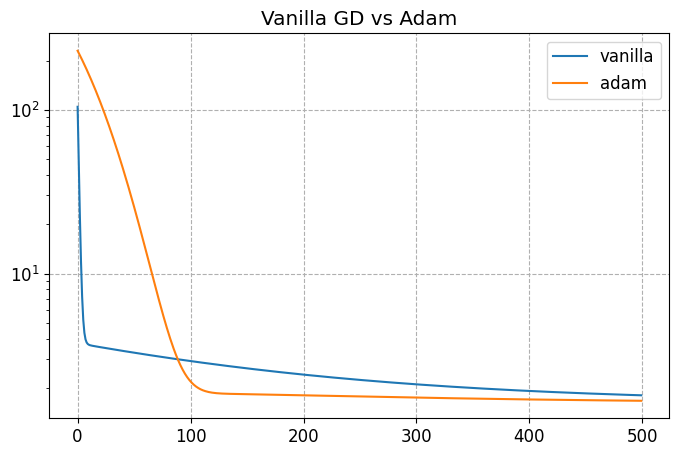

In [36]:
# Cell 11 - Adam optimizer
def adam(X, y, theta_init, alpha=0.05, beta1=0.9, beta2=0.999, eps=1e-8, num_iters=1000):
    m = len(y)
    theta = theta_init.copy().astype(float)
    mt = np.zeros_like(theta)
    vt = np.zeros_like(theta)
    J_history = []
    t = 0
    for i in range(num_iters):
        t += 1
        preds = X.dot(theta)
        error = preds - y
        grad = (1.0 / m) * X.T.dot(error)
        mt = beta1 * mt + (1 - beta1) * grad
        vt = beta2 * vt + (1 - beta2) * (grad ** 2)
        mt_hat = mt / (1 - beta1 ** t)
        vt_hat = vt / (1 - beta2 ** t)
        theta = theta - alpha * mt_hat / (np.sqrt(vt_hat) + eps)
        J_history.append((1.0 / (2*m)) * np.sum((X.dot(theta) - y)**2))
    return theta, np.array(J_history)

theta_adam, J_adam = adam(X, y, np.zeros(2), alpha=0.05, num_iters=500)
print("Adam theta:", theta_adam)
plt.plot(J_vanilla, label='vanilla')
plt.plot(J_adam, label='adam')
plt.yscale('log')
plt.legend()
plt.title('Vanilla GD vs Adam')
plt.show()


/tmp/ipython-input-3049730459.py:27: RuntimeWarning: overflow encountered in square
  J_history.append((1.0 / (2*m)) * np.sum((X.dot(theta) - y)**2))
/tmp/ipython-input-3049730459.py:26: RuntimeWarning: invalid value encountered in subtract
  theta = theta - alpha * grad


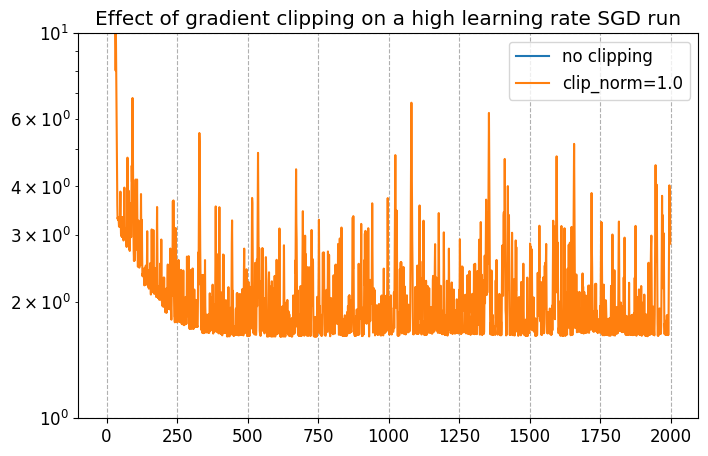

theta no clip: [nan nan]
theta with clip: [4.81143358 2.7355081 ]


In [37]:
# Cell 12 - gradient clipping in SGD
# we will run SGD with a large learning rate and compare clipped vs unclipped
theta_no_clip, J_no_clip = sgd(X, y, np.zeros(2), alpha=0.1, epochs=20, batch_size=1, shuffle=True, clip_norm=None)
theta_clip, J_clip = sgd(X, y, np.zeros(2), alpha=0.1, epochs=20, batch_size=1, shuffle=True, clip_norm=1.0)

plt.plot(J_no_clip, label='no clipping')
plt.plot(J_clip, label='clip_norm=1.0')
plt.yscale('log')
plt.legend()
plt.title('Effect of gradient clipping on a high learning rate SGD run')
plt.show()

print("theta no clip:", theta_no_clip)
print("theta with clip:", theta_clip)
